<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
امید به زندگی
</font>
</h1>

In [ ]:
#!pip install -r requirements_2.txt

In [1]:
import numpy as np
import pandas as pd 

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


In [3]:
test_data = pd.read_csv('test.csv')
test_data

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling
0,Burundi,2015,Developing,119927.0,94.0,9,94.0,94.0,0.7,21,31,NaN,33.681223,18.7,7.3,NaN,10.6
1,Burundi,2014,Developing,989179.0,95.0,0,95.0,95.0,0.7,22,32,7.54,312.748979,18.2,7.4,0.01,10.6
2,Burundi,2013,Developing,96186.0,96.0,0,96.0,96.0,1.0,22,32,8.30,282.755525,17.6,7.4,0.01,10.5
3,Burundi,2012,Developing,931971.0,96.0,49,96.0,96.0,1.2,22,33,8.21,265.285651,17.1,7.5,0.01,10.3
4,Burundi,2011,Developing,94358.0,96.0,129,95.0,96.0,1.5,22,33,8.58,26.479973,16.6,7.6,4.16,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Papua New Guinea,2004,Developing,6161517.0,6.0,1385,59.0,62.0,1.5,11,15,8.39,637.361621,4.4,1.5,0.58,7.6
76,Papua New Guinea,2003,Developing,61724.0,67.0,3863,62.0,68.0,1.4,11,14,6.79,588.358260,39.6,1.5,0.59,7.2
77,Papua New Guinea,2002,Developing,5862316.0,6.0,17620,54.0,61.0,1.4,11,14,7.69,511.665773,38.9,1.5,0.61,6.9
78,Papua New Guinea,2001,Developing,5716152.0,59.0,4023,52.0,55.0,1.3,11,14,6.68,539.415280,38.2,1.5,0.68,6.6


**preparation**

In [5]:
train_data['Status'].unique()

array([0, 1])

In [4]:
Status = {'Developing': 0,
          'Developed' : 1,}

train_data['Status'] = train_data['Status'].map(Status)
test_data['Status'] = test_data['Status'].map(Status)

In [20]:
train_data.isnull().sum()

Country                 0
Year                    0
Status                  0
Population              0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
Life expectancy         0
dtype: int64

In [21]:
test_data.isnull().sum()

Country                 0
Year                    0
Status                  0
Population              0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years    0
Alcohol                 0
Schooling               0
dtype: int64

In [10]:
train_data['Polio'] = train_data['Polio'].fillna(train_data['Polio'].median())
train_data['Diphtheria'] = train_data['Diphtheria'].fillna(train_data['Diphtheria'].median())

In [11]:
train_Population = train_data['Population'].median()

train_data['Population'] = train_data['Population'].fillna(train_Population)

In [12]:
train_B = train_data['Hepatitis B'].median()

train_data['Hepatitis B'] = train_data['Hepatitis B'].fillna(train_B)

In [13]:
train_expenditure = train_data['Total expenditure'].median()

train_data['Total expenditure'] = train_data['Total expenditure'].fillna(train_expenditure)

In [14]:
train_GDP = train_data['GDP'].median()

train_data['GDP'] = train_data['GDP'].fillna(train_GDP)

In [15]:
train_BMI = train_data['BMI'].median()

train_data['BMI'] = train_data['BMI'].fillna(train_BMI)

In [16]:
train_thinness = train_data['thinness  1-19 years'].median()

train_data['thinness  1-19 years'] = train_data['thinness  1-19 years'].fillna(train_thinness)

In [17]:
train_Alcohol = train_data['Alcohol'].median()

train_data['Alcohol'] = train_data['Alcohol'].fillna(train_Alcohol)

In [18]:
train_Schooling = train_data['Schooling'].median()

train_data['Schooling'] = train_data['Schooling'].fillna(train_Schooling)

In [19]:
test_data['Hepatitis B'] = test_data['Hepatitis B'].fillna(train_data['Hepatitis B'].median())
test_data['Total expenditure'] = test_data['Total expenditure'].fillna(train_data['Total expenditure'].median())
test_data['Alcohol'] = test_data['Alcohol'].fillna(train_data['Alcohol'].median())
test_data['GDP'] = test_data['GDP'].fillna(train_data['GDP'].median())

<AxesSubplot:>

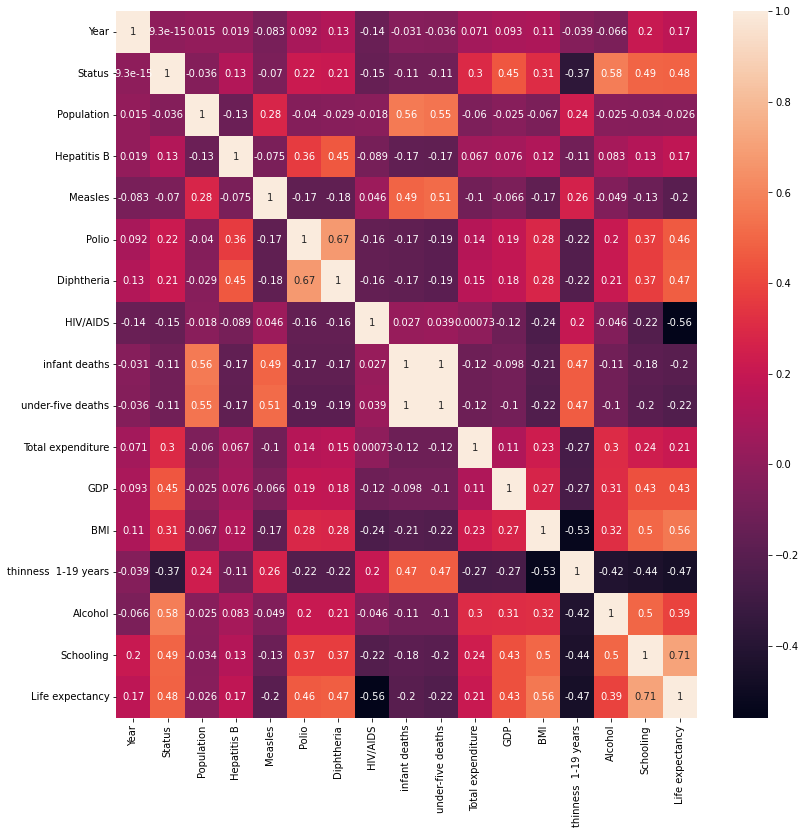

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(13,13))
sns.heatmap(train_data.corr(),annot=True)

In [23]:
# drop comments column 
train_data.drop(columns= ['Country','Population'], inplace= True)
test_data.drop(columns= ['Country','Population'], inplace= True)

**model**

In [25]:
y=  train_data[['Life expectancy']]

In [26]:
x = train_data.copy()
x.drop(columns= ['Life expectancy'], inplace= True)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_transformer = PolynomialFeatures(degree=2, include_bias=True)
X_train = poly_transformer.fit_transform(X_train)
X_val = poly_transformer.transform(X_val)
X_test = poly_transformer.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [30]:
# evaluate your model by val
from sklearn.metrics import r2_score

r2_score(y_val, y_pred)

0.8417013431529389

In [31]:
y_pred = model.predict(X_test)

In [33]:
# evaluate your model by test

r2_score(y_test, y_pred)

0.8133934288347263